<Center>
  
# Erasmus Mundus JMD Nuclear Physics  
### Monte Carlo - BootStrapping Exercise Set  


###### Craig Michie

<Center>
<hr>

Firstly, Import all required packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy 
import random
np.warnings.filterwarnings('ignore')
from scipy import stats

<hr>

## Problem 1: Read or code directly ${(x_i\pm \sigma_i,y_i \pm \sigma_i)_{i=1}^N} $
 

In [2]:
d = {'x':[0.50,0.90,1.50,1.80,2.65,3.00,3.45,4.10,4.65,5.25],'y':[2.40,3.10,4.70,4.90,6.30,8.05,8.80,11.50,11.20,14.30],
    '$\sigma_x$':[0.02,0.09,0.15,0.18,0.45,0.05,0.07,0.25,0.15,0.25],'$\sigma_y$':[0.60,1.80,1.50,0.60,3.00,0.20,0.40
                                                                                       ,3.20,0.80,2.40]}
fd = pd.DataFrame(data=d)
fd

,x,y,$\sigma_x$,$\sigma_y$
0,0.50,2.40,0.02,0.6
1,0.90,3.10,0.09,1.8
2,1.50,4.70,0.15,1.5
3,1.80,4.90,0.18,0.6
4,2.65,6.30,0.45,3.0
5,3.00,8.05,0.05,0.2
6,3.45,8.80,0.07,0.4
7,4.10,11.50,0.25,3.2
8,4.65,11.20,0.15,0.8
9,5.25,14.30,0.25,2.4


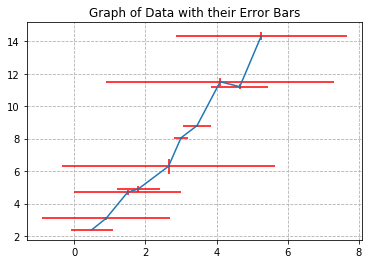

In [3]:
plt.errorbar(fd['x'],fd['y'],fd['$\sigma_x$'],fd['$\sigma_y$'],ecolor = 'r')
plt.grid(linestyle='dashed')
plt.title('Graph of Data with their Error Bars')
plt.show()

<hr>

## Problem 2: Obtain up to M = 1000 sets of datapoints $((x_i,y_i)_k)_{i=1,...,N}^{k=1,...,M}$ by resampling from your experimental data. Use the generator producing random numbers with Guassian Distribution

In [4]:
def newpoint():
    '''
    To acquire a set of data points by resampling the data given to us we will use a loop to generate random values 
    inbetween the range of x and y.

    To use np.random.normal (a guassian distribution) we want the mean and standard deviation 
    '''
    xmean, xstd = np.mean(fd['x']), np.std(fd['x'])
    ymean, ystd = np.mean(fd['y']), np.std(fd['y'])
    points = []
    pointss = []

    for n in range(1000): #M = 1000 for datasets
        points = []
        for m in range(10): # N = 10 datapoints per data set
            x = np.random.normal(xmean,xstd)
            y = np.random.normal(ymean,ystd)
            point = [x,y]
            points.append(point)
        pointss.append(points)
    a = pointss
    return a

In [5]:
a = newpoint()
print(a[0])


[[3.8856731250207064, 16.904370048922644], [1.4091924431390388, 7.6580985989783095], [2.7884220960546866, 8.599227494229451], [3.266603795396893, -0.5218327239321088], [3.0696238431134777, 2.220809598563994], [2.5429703878128147, 8.277294797232111], [2.536813789562086, 14.494685853710747], [4.350854844130348, 12.61218607990789], [2.049781375103399, 9.862765760177634], [2.207666375692536, 4.89831450227951]]


<hr>

## Problem 3: For each artificially resampled data set, calculate their own slope and intercept 

In [6]:
 def slopeintcalc(datasets):
    '''
    This function calculates the slope and intercept for each dataset
    and appends slope and intercept of each dataset to a list that 
    is returned

    '''
    a = np.array(datasets)
    slopelist = [] 
    interceptlist = []
    for n in range(1000):
        slope, intercept, r_value, p_value, std_err = stats.linregress(a[n][:,0],a[n][:,1])
        slopelist.append(slope)
        interceptlist.append(intercept)
    return slopelist, interceptlist

In [7]:
slope, intercept = slopeintcalc(a)
print(slope[0],intercept[0])

1.5108701787584424 4.25389822385045


<hr>

## Problem 4: Once the loop is finished, provide as output: $\overline{a} \pm \sigma_a$ and $\overline{b} \pm \sigma_b$ using the mean and standard deviation of the $(a_k,b_k)_{k=1}^M$ values obtained respectively

In [8]:
def meanstdcalc(datasets):
    '''
    Function that takes the created dataset from problem 1, calculates the mean, standard deviation
    and outputs a list of the asked values for all datasets 
    '''
    a = np.array(datasets)
    meanlist = []
    stdlist = []
    output = []
    for n in range(1000):
        x_mean, x_std = np.mean(a[n][:,0]), np.std(a[n][:,0])
        y_mean, y_std = np.mean(a[n][:,1]), np.mean(a[n][:,0])
        meanlist.append([x_mean,y_mean])
        stdlist.append([x_std,y_std])
        output.append([x_mean+x_std,y_mean+y_std])
    return meanlist, stdlist ,output

In [9]:
mean, std, output = meanstdcalc(a)
print(output[0])

[3.6388056892587595, 11.311352208509616]


<hr>

## Problem 5: plot your experimental datapoints with errorbars with the result of this linear regression

In [10]:
'''
First we need to calculate the slope and intercept for the given datapoints
'''
l = np.array(fd['x'])
m = np.array(fd['y'])
points1 = []

for n in range(10):
    points1.append([l[n],m[n]])

points1 = np.array(points1)

slope, intercept, r_value, p_value, std_err = stats.linregress(points1[:,0],points1[:,1])

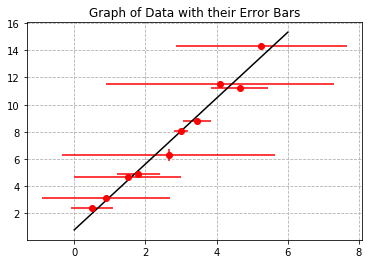

In [11]:
#Plotting
x = np.linspace(0,6)
plt.errorbar(fd['x'],fd['y'],fd['$\sigma_x$'],fd['$\sigma_y$'], fmt='o', c = 'red')
plt.plot(x,slope*x+intercept, color ='black')
plt.grid(linestyle='dashed')
plt.title('Graph of Data with their Error Bars')
plt.show()